# Contour Lines

o generate contour lines for the Titanic dataset, we can visualize the relationship between two features (e.g., Age and Fare) and predict whether a passenger survived. We can use a logistic regression model to predict survival based on these features and plot the contour lines of the predicted probabilities across a grid of values.

Here’s the step-by-step code that will:

Load and preprocess the Titanic dataset.
Train a logistic regression model using two features (Age and Fare).
Create a grid of values and plot the contour lines for the model’s predicted probabilities.

Train a logistic regression model using two features (Age and Fare).
Create a grid of values and plot the contour lines for the model’s predicted probabilities.

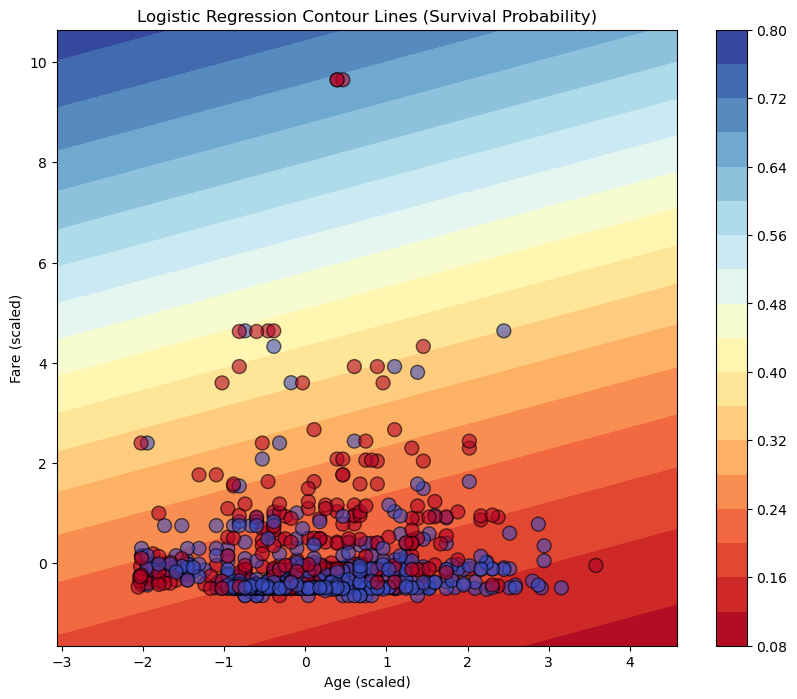

In [1]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by selecting specific features and converting categorical variables.
    """
    # Load the Titanic dataset
    df = pd.read_csv('titanic.csv')
    
    # Selecting only the features: Age and Fare (for simplicity)
    df = df[['Age', 'Fare', 'Survived']]
    
    # Drop rows with missing values
    df = df.dropna()
    
    # Convert 'Survived' to numerical values: 0 = No, 1 = Yes
    X = df[['Age', 'Fare']].values
    y = df['Survived'].values
    
    # Standardize the features for better performance in logistic regression
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Train a Logistic Regression model
def train_logistic_regression(X, y):
    """
    Train the logistic regression model using the selected features.
    """
    model = LogisticRegression()
    model.fit(X, y)
    return model

# Step 3: Create a mesh grid and plot contour lines
def plot_contour(model, X, y):
    """
    Generate contour lines for the logistic regression model predictions.
    """
    # Define the grid of values for the features (Age and Fare)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create a grid of points to evaluate the model
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Reshape the grid to be a list of points
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Scale the grid points
    scaler = StandardScaler()
    grid_points_scaled = scaler.fit_transform(grid_points)
    
    # Predict the probabilities of survival on the grid points
    probs = model.predict_proba(grid_points_scaled)[:, 1].reshape(xx.shape)
    
    # Plotting
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(xx, yy, probs, 20, cmap='RdYlBu')
    plt.colorbar(contour)
    plt.title('Logistic Regression Contour Lines (Survival Probability)')
    plt.xlabel('Age (scaled)')
    plt.ylabel('Fare (scaled)')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', marker='o', s=100, alpha=0.6)
    plt.show()

# Step 4: Load data, train the model, and plot the contour lines
X, y = load_and_preprocess_data()
model = train_logistic_regression(X, y)
plot_contour(model, X, y)


1. Data Preprocessing:

. We load the Titanic dataset and select two features: Age

and Fare , along with the target Survived

. We clean the data by dropping any rows with missing
values, then standardize the features using

StandardScaler

2. Logistic Regression:

. We create and train a logistic regression model to predict
survival ( Survived ) using Age and F
Fare as features.

Age

and

Fare

and

Fare

features.

3. Plotting Contour Lines:

. We create a mesh grid over the possible values of Age and

Fare

. We predict the probability of survival across this grid and
plot the contour lines, which represent regions of the
feature space with similar survival probabilities.

. The training points ( Age and Fare values) are overlaid on
the contour plot.

4. Visualization:

. The contour plot shows how the logistic regression model's
probability of survival changes with

Expected Output:

. A contour plot showing the decision boundary for survival
probability based on the Age

. The training data points are plotted on top of the contours, with
different colors representi
he survival status ( 0 or 1).

# Directional derivative

In [2]:
import numpy as np

# Define the function (e.g., f(x, y) = x^2 + y^2)
def func(x, y):
    return x**2 + y**2

# Calculate the gradient of the function (partial derivatives)
def gradient(func, x, y):
    epsilon = 1e-5  # Small value to calculate numerical derivative
    df_dx = (func(x + epsilon, y) - func(x - epsilon, y)) / (2 * epsilon)  # Partial derivative with respect to x
    df_dy = (func(x, y + epsilon) - func(x, y - epsilon)) / (2 * epsilon)  # Partial derivative with respect to y
    return np.array([df_dx, df_dy])

# Function to compute the directional derivative
def directional_derivative(func, x, y, direction_vector):
    # Compute the gradient at the point (x, y)
    grad = gradient(func, x, y)
    
    # Normalize the direction vector to get a unit vector
    unit_vector = direction_vector / np.linalg.norm(direction_vector)
    
    # Compute the directional derivative as the dot product of the gradient and the unit vector
    return np.dot(grad, unit_vector)

# Example: Evaluate the directional derivative of f(x, y) = x^2 + y^2 at the point (1, 1) in the direction of (1, 1)
x, y = 1, 1
direction = np.array([1, 1])

# Calculate the directional derivative
result = directional_derivative(func, x, y, direction)

print(f"The directional derivative at point ({x}, {y}) in the direction {direction} is: {result}")


The directional derivative at point (1, 1) in the direction [1 1] is: 2.8284271247490187


# Hessian plot

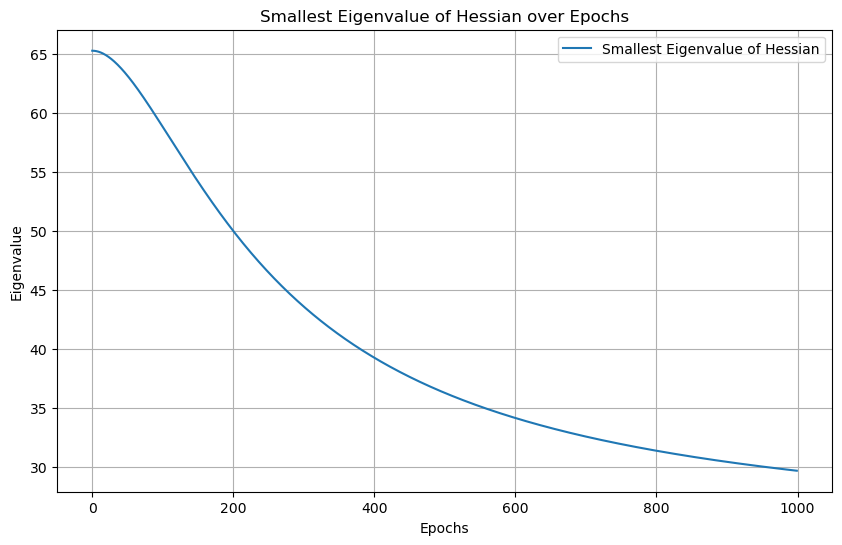

In [3]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Define the logistic regression model and compute the Hessian matrix
def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

def compute_hessian(X, y, weights):
    """
    Compute the Hessian matrix for logistic regression.
    Hessian = X^T * D * X, where D is a diagonal matrix with the elements of the gradient vector.
    """
    predictions = sigmoid(np.dot(X, weights))  # Predicted probabilities
    D = np.diag(predictions * (1 - predictions))  # Diagonal matrix of gradients
    hessian = np.dot(np.dot(X.T, D), X)  # Hessian matrix
    return hessian

# Step 3: Visualize the Hessian matrix eigenvalues over iterations
def visualize_hessian():
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize weights and learning rate
    weights = np.zeros(X_train.shape[1])
    learning_rate = 0.01
    epochs = 1000
    
    # List to store eigenvalues of the Hessian at each iteration
    eigenvalues = []

    # Gradient Descent loop
    for epoch in range(epochs):
        # Compute the predictions and error
        predictions = sigmoid(np.dot(X_train, weights))
        error = predictions - y_train
        
        # Compute the gradient
        grad = np.dot(X_train.T, error) / len(y_train)
        
        # Compute the Hessian matrix
        hessian = compute_hessian(X_train, y_train, weights)
        
        # Eigenvalues of the Hessian
        eigenvalues_epoch = np.linalg.eigvals(hessian)
        eigenvalues.append(np.min(eigenvalues_epoch))  # Record the smallest eigenvalue
        
        # Update weights using gradient descent
        weights -= learning_rate * grad

    # Plot the smallest eigenvalue of the Hessian over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), eigenvalues, label='Smallest Eigenvalue of Hessian')
    plt.title('Smallest Eigenvalue of Hessian over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Eigenvalue')
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the visualization function
visualize_hessian()


Expected Output:
A plot showing the smallest eigenvalue of the Hessian matrix over epochs. This can help us understand how the curvature of the loss function behaves as the model learns.

# Convexity plot for the dataset

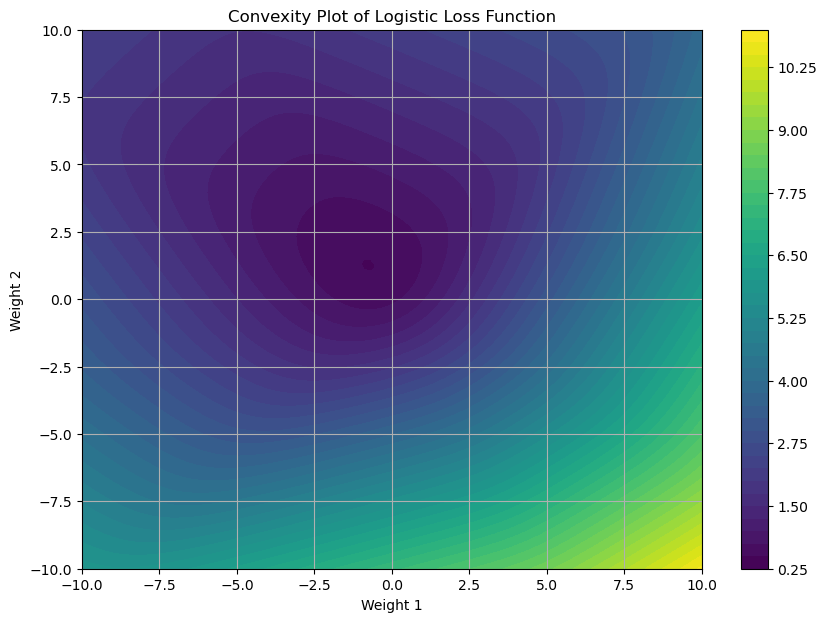

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    df = pd.read_csv('titanic.csv')
    df.drop(columns=['Name'], inplace=True)
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Logistic regression model
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary cross-entropy loss function
def compute_loss(X, y, weights, bias):
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)
    return log_loss(y, predictions)

# Generate a convexity plot by varying two parameters (weights)
def plot_convexity():
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()

    # Select two features from the dataset for 2D visualization
    X_subset = X[:, :2]  # Take the first two features for simplicity
    
    # Initialize weight and bias
    weights = np.zeros(2)
    bias = 0
    
    # Create a grid of weights for visualization
    weight_range = np.linspace(-10, 10, 100)
    W1, W2 = np.meshgrid(weight_range, weight_range)
    
    # Compute loss for each point in the grid
    Z = np.zeros_like(W1)
    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            weights[0], weights[1] = W1[i, j], W2[i, j]
            loss = compute_loss(X_subset, y, weights, bias)
            Z[i, j] = loss
    
    # Plot the loss surface
    plt.figure(figsize=(10, 7))
    contour = plt.contourf(W1, W2, Z, 50, cmap='viridis')
    plt.colorbar(contour)
    plt.title("Convexity Plot of Logistic Loss Function")
    plt.xlabel('Weight 1')
    plt.ylabel('Weight 2')
    plt.grid(True)
    plt.show()

# Generate the convexity plot
plot_convexity()


Explanation:
Loading the Titanic Dataset: The data is preprocessed by converting categorical variables into numeric form and scaling the features to standardize them.
Logistic Regression Model: A sigmoid function is used to compute probabilities. The binary cross-entropy loss function (log loss) is used to measure how well the model predicts the actual outcomes.
Convexity Plot: We vary two weights in the logistic regression model (chosen from the first two features) and calculate the loss function for each combination of these weights. The resulting surface is visualized as a contour plot, showing how the loss function behaves and revealing its convex nature.
Expected Output:
The plot will show a convex loss surface, which should look like a smooth, bowl-shaped curve with a single minimum. This visualization will help to demonstrate the convexity of the binary cross-entropy loss function for logistic regression.

# Moving averages

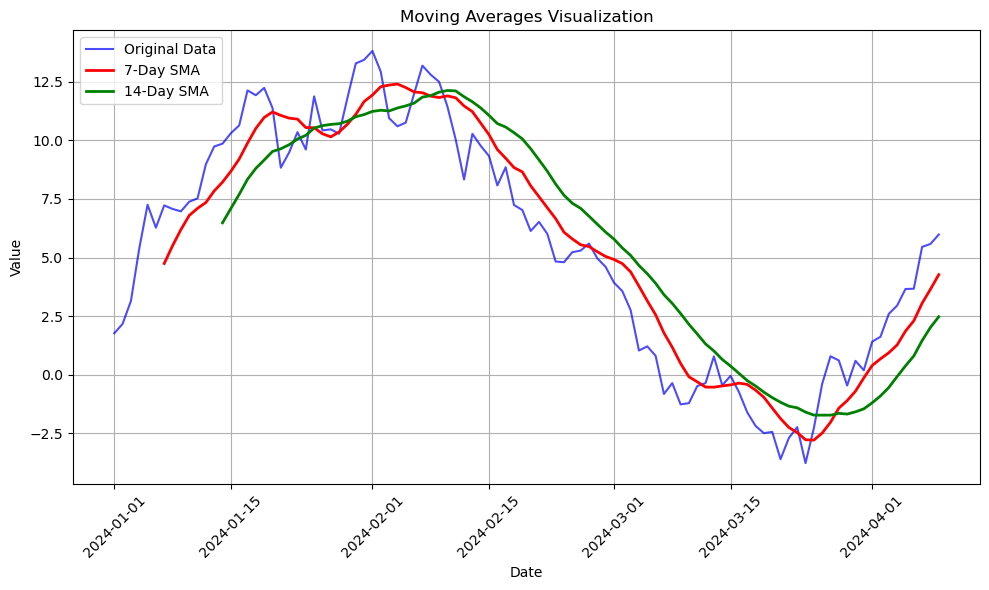

In [7]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data (or you can load your own time-series data)
np.random.seed(0)
data = np.random.randn(100).cumsum()  # Cumulative sum to simulate a random walk

# Convert to pandas DataFrame for easier handling
df = pd.DataFrame(data, columns=['Value'])
df['Date'] = pd.date_range(start='2024-01-01', periods=len(df), freq='D')

# Step 2: Calculate the Simple Moving Average (SMA) with a window size of 7
df['SMA_7'] = df['Value'].rolling(window=7).mean()

# Calculate another moving average for comparison (e.g., 14-day SMA)
df['SMA_14'] = df['Value'].rolling(window=14).mean()

# Step 3: Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Value'], label='Original Data', color='blue', alpha=0.7)
plt.plot(df['Date'], df['SMA_7'], label='7-Day SMA', color='red', linewidth=2)
plt.plot(df['Date'], df['SMA_14'], label='14-Day SMA', color='green', linewidth=2)

# Add labels and title
plt.title("Moving Averages Visualization")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Exponentially Weighted Moving Average (EWMA)

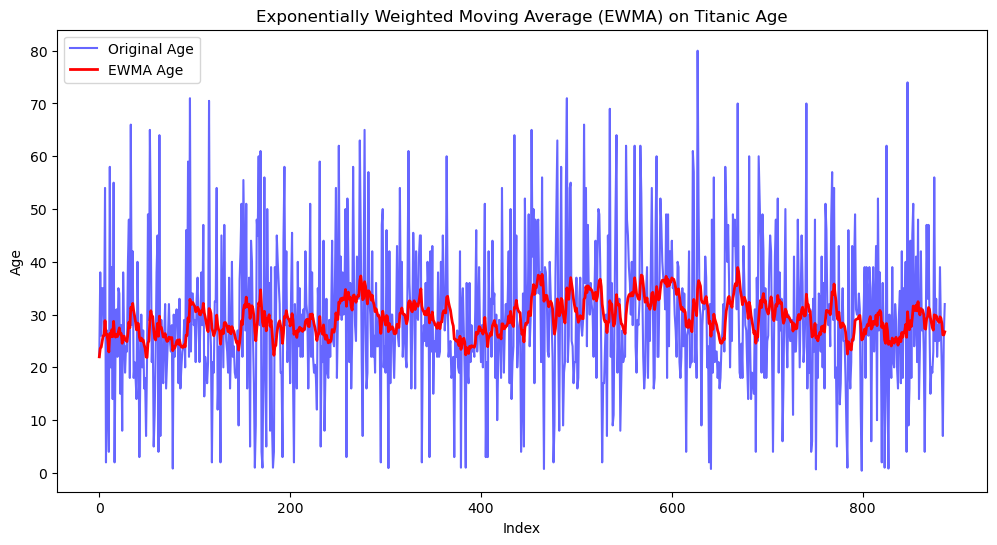

In [8]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and handle missing values.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Handling missing values: Fill missing Age with the median
    df['Age'].fillna(df['Age'].median(), inplace=True)
    
    # Optionally, you could also drop rows with missing 'Age' or other columns
    # df.dropna(subset=['Age'], inplace=True)

    return df

# Step 2: Apply EWMA to the 'Age' column
def apply_ewma(df, alpha=0.1):
    """
    Apply Exponentially Weighted Moving Average (EWMA) to the 'Age' column.
    - df: DataFrame containing the Titanic dataset.
    - alpha: Smoothing factor (between 0 and 1).
    """
    df['EWMA_Age'] = df['Age'].ewm(alpha=alpha, adjust=False).mean()
    return df

# Step 3: Visualize the original 'Age' and the 'EWMA_Age'
def plot_ewma(df):
    """
    Plot the original 'Age' values and the 'EWMA_Age' values.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df['Age'], label='Original Age', color='blue', alpha=0.6)
    plt.plot(df['EWMA_Age'], label='EWMA Age', color='red', linewidth=2)
    plt.title('Exponentially Weighted Moving Average (EWMA) on Titanic Age')
    plt.xlabel('Index')
    plt.ylabel('Age')
    plt.legend()
    plt.show()

# Step 4: Main function to run the process
def main():
    # Load and preprocess the Titanic dataset
    df = load_and_preprocess_data()
    
    # Apply EWMA to the 'Age' column
    df = apply_ewma(df, alpha=0.1)
    
    # Visualize the results
    plot_ewma(df)

# Run the code
main()


# Supporting Hyperplane

Steps:
Preprocess the data.
Train the Support Vector Machine (SVM) model.
Plot the decision boundary (hyperplane) separating the two classes (survived vs. not survived).

Accuracy on test set: 0.7416


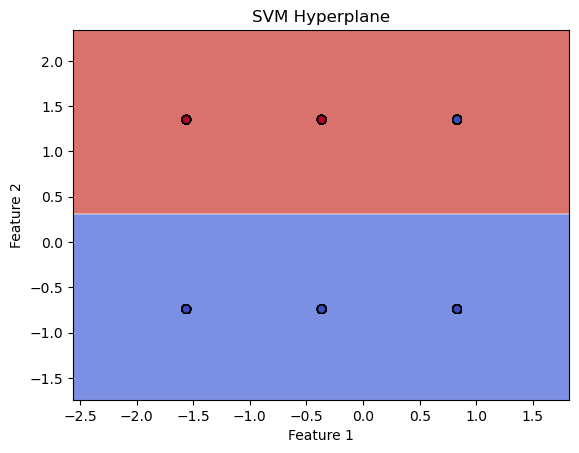

In [10]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Train SVM model
def train_svm_model(X_train, y_train):
    """
    Train an SVM classifier with a linear kernel.
    """
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train, y_train)
    return model

# Step 3: Plotting the Support Vector Hyperplane
def plot_hyperplane(model, X_train, y_train):
    """
    Plot the decision boundary and the support vectors for the SVM model.
    """
    # Create a mesh grid to plot the decision surface
    h = .02  # step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the class for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("SVM Hyperplane")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Step 4: Train and evaluate the model
def train_and_evaluate():
    """
    Train the SVM model and evaluate its performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # We will use only two features for easy visualization (e.g., Pclass, Age)
    X = X[:, :2]  # Use the first two columns of features for visualization
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the SVM model
    model = train_svm_model(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test set: {accuracy:.4f}")
    
    # Plot the decision boundary (hyperplane)
    plot_hyperplane(model, X_train, y_train)

# Step 5: Run the training and evaluation function
train_and_evaluate()


Expected Output:
The model will print the accuracy on the test set.
A plot will show the decision boundary (hyperplane), where different regions represent the predicted classes (Survived vs Not Survived), and support vectors will be highlighted

# Piecewise linear Function

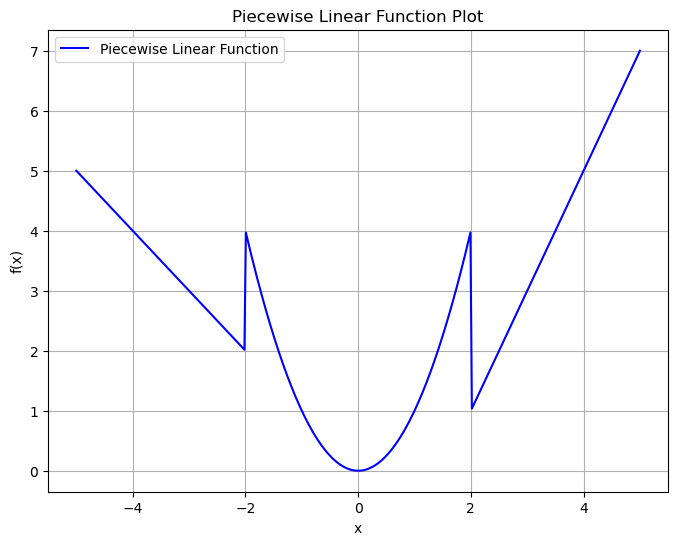

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the piecewise linear function
def piecewise_linear(x):
    """
    Piecewise linear function:
    f(x) = -x if x < -2
    f(x) = x^2 if -2 <= x < 2
    f(x) = 2x - 3 if x >= 2
    """
    if x < -2:
        return -x
    elif -2 <= x < 2:
        return x**2
    else:
        return 2*x - 3

# Create a vector of x values
x_values = np.linspace(-5, 5, 400)

# Apply the piecewise linear function to each x value
y_values = np.array([piecewise_linear(x) for x in x_values])

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label="Piecewise Linear Function", color="blue")
plt.title("Piecewise Linear Function Plot")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


Expected Output:
A plot showing the piecewise function, which has different linear behavior depending on the value of x

# L1 and L2 norm

Epoch 0, Loss: 0.6918
Epoch 100, Loss: 0.6064
Epoch 200, Loss: 0.5736
Epoch 300, Loss: 0.5593
Epoch 400, Loss: 0.5524
Epoch 500, Loss: 0.5488
Epoch 600, Loss: 0.5469
Epoch 700, Loss: 0.5457
Epoch 800, Loss: 0.5450
Epoch 900, Loss: 0.5446

Accuracy on test set with L2 regularization: 0.7416


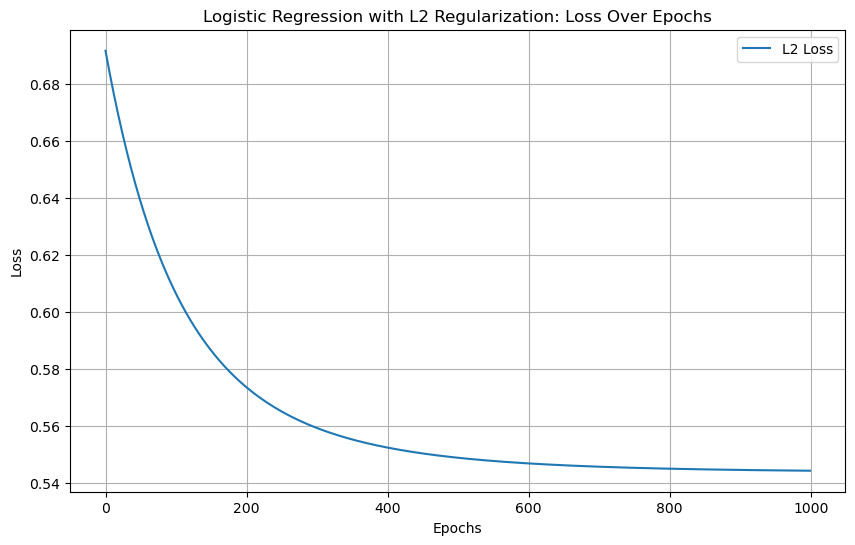

In [12]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Logistic Regression with L1 and L2 Regularization
class LogisticRegressionWithRegularization:
    def __init__(self, learning_rate=0.01, epochs=1000, lambda_reg=0.1, regularization_type='L2'):
        """
        Initialize the Logistic Regression model with hyperparameters and regularization type.
        - learning_rate: The step size for gradient descent.
        - epochs: The number of iterations over the dataset.
        - lambda_reg: The regularization strength.
        - regularization_type: 'L1' for Lasso and 'L2' for Ridge.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_reg = lambda_reg
        self.regularization_type = regularization_type
        self.losses = []  # Store the loss over epochs

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute Binary Cross-Entropy Loss with regularization.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        
        # Compute binary cross-entropy loss
        loss = log_loss(y, predictions)
        
        # Apply regularization
        if self.regularization_type == 'L1':
            # L1 Regularization (Lasso)
            reg_loss = self.lambda_reg * np.sum(np.abs(self.weights))
        elif self.regularization_type == 'L2':
            # L2 Regularization (Ridge)
            reg_loss = self.lambda_reg * np.sum(self.weights**2)
        
        total_loss = loss + reg_loss
        return total_loss

    def fit(self, X, y):
        """
        Train the Logistic Regression model using Gradient Descent with regularization.
        - X: Feature matrix (training data)
        - y: Target vector (labels)
        """
        # Initialize weights, bias, and velocity
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # Gradient Descent loop
        for epoch in range(self.epochs):
            # Step 1: Calculate predictions
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            
            # Step 2: Compute gradients
            error = predictions - y
            dw = np.dot(X.T, error) / len(y)  # Gradient with respect to weights
            db = np.sum(error) / len(y)       # Gradient with respect to bias
            
            # Step 3: Apply L1 or L2 Regularization to the gradient of weights
            if self.regularization_type == 'L1':
                # L1 Regularization (Lasso)
                dw += self.lambda_reg * np.sign(self.weights)
            elif self.regularization_type == 'L2':
                # L2 Regularization (Ridge)
                dw += 2 * self.lambda_reg * self.weights
            
            # Step 4: Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Step 5: Calculate and store the loss
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
            
            # Print loss every 100 epochs for monitoring
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Predict binary labels for the given input data.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model and evaluate its performance
def train_and_evaluate(regularization_type='L2'):
    """
    Train the Logistic Regression model with the specified regularization type 
    and evaluate its performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the model with the selected regularization type
    model = LogisticRegressionWithRegularization(learning_rate=0.01, epochs=1000, lambda_reg=0.1, regularization_type=regularization_type)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on test set with {regularization_type} regularization: {accuracy:.4f}")
    
    # Plot the loss over epochs to visualize convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label=f'{regularization_type} Loss')
    plt.title(f"Logistic Regression with {regularization_type} Regularization: Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the training and evaluation function with L1 regularization (Lasso) or L2 regularization (Ridge)
train_and_evaluate(regularization_type='L2')  # To test L2 regularization, change to 'L1' for L1 regularization


# Hinge Loss function

Epoch 0, Loss: 0.9945
Epoch 100, Loss: 0.5189
Epoch 200, Loss: 0.4524
Epoch 300, Loss: 0.4217
Epoch 400, Loss: 0.4114
Epoch 500, Loss: 0.4083
Epoch 600, Loss: 0.4071
Epoch 700, Loss: 0.4063
Epoch 800, Loss: 0.4059
Epoch 900, Loss: 0.4058

Accuracy on test set: 0.7416


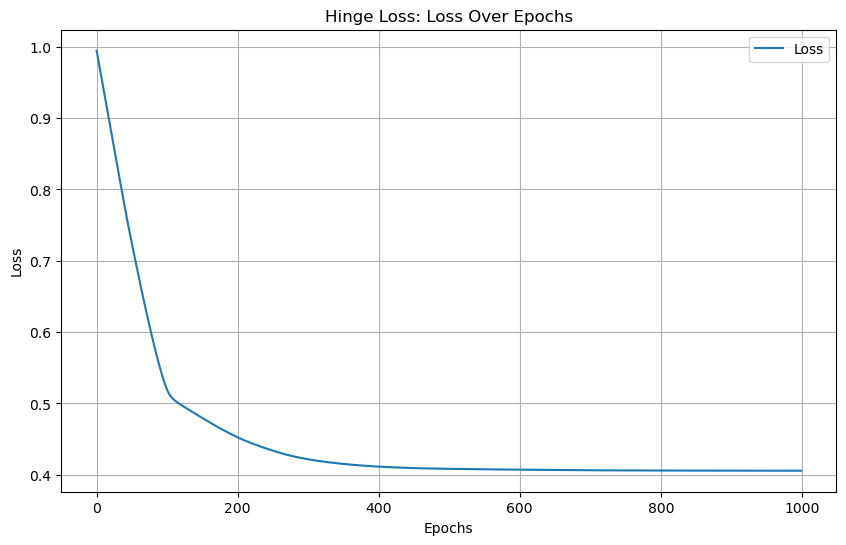

In [13]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Convert the target variable to -1 and +1 (for hinge loss)
    y = np.where(y == 0, -1, 1)
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Hinge Loss and Gradient Descent
class HingeLossClassifier:
    def __init__(self, learning_rate=0.01, epochs=1000):
        """
        Initialize the model with hyperparameters.
        - learning_rate: The step size for gradient descent.
        - epochs: The number of iterations over the dataset.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.losses = []  # Store the loss over epochs
    
    def hinge_loss(self, X, y, weights, bias):
        """
        Calculate the hinge loss for a given set of parameters.
        """
        # Calculate the scores (dot product between weights and features)
        scores = np.dot(X, weights) + bias
        
        # Apply the hinge loss function
        loss = np.mean(np.maximum(0, 1 - y * scores))
        return loss
    
    def gradient(self, X, y, weights, bias):
        """
        Calculate the gradient of the hinge loss function with respect to weights and bias.
        """
        scores = np.dot(X, weights) + bias
        margin = 1 - y * scores
        
        # Gradient with respect to weights (using the hinge loss)
        dw = -np.dot(X.T, (y * (margin > 0))) / len(y)
        
        # Gradient with respect to bias
        db = -np.sum(y * (margin > 0)) / len(y)
        
        return dw, db
    
    def fit(self, X, y):
        """
        Train the model using gradient descent with hinge loss.
        """
        # Initialize weights and bias
        weights = np.zeros(X.shape[1])
        bias = 0
        
        # Perform gradient descent
        for epoch in range(self.epochs):
            dw, db = self.gradient(X, y, weights, bias)
            
            # Update weights and bias
            weights -= self.learning_rate * dw
            bias -= self.learning_rate * db
            
            # Calculate the current loss and store it
            loss = self.hinge_loss(X, y, weights, bias)
            self.losses.append(loss)
            
            # Print loss every 100 epochs
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        
        self.weights = weights
        self.bias = bias
    
    def predict(self, X):
        """
        Predict binary labels using the trained model.
        """
        scores = np.dot(X, self.weights) + self.bias
        return np.sign(scores)

# Step 3: Train the model and evaluate its performance
def train_and_evaluate():
    """
    Train the Hinge Loss Classifier on the Titanic dataset and evaluate its performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the classifier
    model = HingeLossClassifier(learning_rate=0.01, epochs=1000)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on test set: {accuracy:.4f}")
    
    # Plot the loss over epochs to visualize convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label='Loss')
    plt.title("Hinge Loss: Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the training and evaluation function
train_and_evaluate()


# Dogleg method

Epoch 0, Loss: 0.8183
Epoch 100, Loss: 28.7231
Epoch 200, Loss: 28.7231
Epoch 300, Loss: 28.7231
Epoch 400, Loss: 28.7231
Epoch 500, Loss: 28.7231
Epoch 600, Loss: 28.7231


C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1

Epoch 700, Loss: 28.7231
Epoch 800, Loss: 28.7231


C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1

Epoch 900, Loss: 28.7231

Accuracy on test set: 0.2584


C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\3802699990.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1

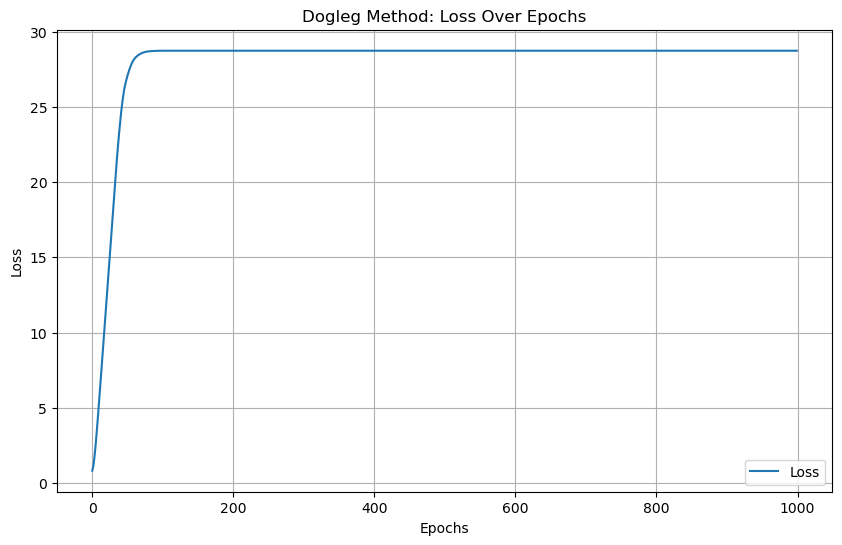

In [14]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Logistic Regression with Dogleg Method
class LogisticRegressionDogleg:
    def __init__(self, learning_rate=0.01, epochs=1000, tolerance=1e-6):
        """
        Initialize the Logistic Regression model with hyperparameters.
        - learning_rate: The step size for gradient descent.
        - epochs: The number of iterations over the dataset.
        - tolerance: The convergence criterion.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.tolerance = tolerance
        self.losses = []  # Store the loss over epochs

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute Binary Cross-Entropy Loss.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        # Add a small constant (1e-8) to avoid log(0)
        loss = log_loss(y, predictions)
        return loss

    def compute_gradients(self, X, y):
        """
        Compute the gradients for weights and bias.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        error = predictions - y
        dw = np.dot(X.T, error) / len(y)  # Gradient with respect to weights
        db = np.sum(error) / len(y)       # Gradient with respect to bias
        return dw, db

    def dogleg_method(self, X, y):
        """
        Apply the Dogleg method to optimize the parameters of the logistic regression model.
        """
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        v_w = np.zeros(X.shape[1])  # Velocity for weights
        v_b = 0  # Velocity for bias
        
        # Dogleg method loop
        for epoch in range(self.epochs):
            # Step 1: Compute the gradients
            dw, db = self.compute_gradients(X, y)
            
            # Step 2: Compute the Gauss-Newton direction (Hessian approximation)
            H = np.dot(X.T, X) / len(y)  # Hessian approximation
            gn_direction = np.linalg.inv(H).dot(dw)  # Gauss-Newton direction
            
            # Step 3: Compute the Steepest Descent direction
            sd_direction = -dw  # Steepest descent direction
            
            # Step 4: Compute the Dogleg step: Check if the Gauss-Newton direction is too large
            alpha = 1  # Initial step size
            step = np.zeros_like(self.weights)
            if np.linalg.norm(gn_direction) <= np.linalg.norm(sd_direction):
                # Full Gauss-Newton step if it's smaller than steepest descent
                step = gn_direction
            else:
                # Step along the steepest descent direction
                step = sd_direction
            
            # Update weights and bias using the Dogleg step
            self.weights += alpha * step
            self.bias += alpha * db
            
            # Compute the loss and store it for plotting
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
            
            # Print loss every 100 epochs for monitoring
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
            
            # Check for convergence
            if np.linalg.norm(step) < self.tolerance:
                print(f"Convergence reached at epoch {epoch}.")
                break

    def predict(self, X):
        """
        Predict binary labels for the given input data.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model and evaluate its performance
def train_and_evaluate():
    """
    Train the Logistic Regression model using the Dogleg method and evaluate its performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the model
    model = LogisticRegressionDogleg(learning_rate=0.01, epochs=1000, tolerance=1e-6)
    
    # Train the model using the Dogleg method
    model.dogleg_method(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on test set: {accuracy:.4f}")
    
    # Plot the loss over epochs to visualize convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label='Loss')
    plt.title("Dogleg Method: Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the training and evaluation function
train_and_evaluate()


Key Concepts in the Code:
Data Preprocessing:

The Titanic dataset is loaded, categorical columns are converted, and features are standardized using StandardScaler.
Dogleg Method:

Gauss-Newton Direction: Approximates the Hessian matrix (second-order derivative) and computes a step in the direction of the curvature.
Steepest Descent: Uses the negative gradient direction when the Gauss-Newton direction is too large.
The Dogleg Method combines these two directions to compute a step size that balances between speed and stability.
Training and Evaluation:

The logistic regression model is trained using the Dogleg method, and its performance is evaluated on the test set.
A loss curve is plotted to monitor convergence.

# Lagranges Multiplier

Lagrange Multipliers are a powerful method for finding the local maxima and minima of a function subject to equality constraints. However, applying Lagrange multipliers directly to machine learning datasets like the Titanic dataset doesn't align perfectly, as it is usually applied to optimization problems with constraints.

In the context of machine learning and regression, Lagrange Multipliers might be more useful for constrained optimization problems. For example, it can be used in Support Vector Machines (SVM) with constraints or for problems involving equality constraints.

Using Lagrange Multipliers for Logistic Regression:
While Lagrange multipliers are commonly used in constrained optimization problems, let's illustrate the approach to minimize a simple loss function with a constraint, which is often how Lagrange multipliers are used in the context of optimization problems.

Here, we'll apply it to logistic regression, where the constraint could be something like a regularization constraint (e.g., the sum of weights should be equal to a specific value). We’ll approach this problem by adding a constraint in the optimization of a logistic regression model.

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from scipy.optimize import minimize

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    df = pd.read_csv('titanic.csv')
    df.drop(columns=['Name'], inplace=True)
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Define the logistic regression function with Lagrange multiplier
def logistic_regression_with_lagrange(X, y, C, lambda_init=1.0):
    """
    Perform logistic regression with a Lagrange multiplier for the constraint: sum(theta) = C.
    - X: Feature matrix
    - y: Target vector
    - C: The constant for the constraint (sum(theta) = C)
    - lambda_init: Initial guess for the Lagrange multiplier lambda
    """
    # Initialize weights
    theta_init = np.zeros(X.shape[1])
    
    # Logistic loss function
    def logistic_loss(theta, X, y):
        z = np.dot(X, theta)
        predictions = 1 / (1 + np.exp(-z))  # Sigmoid function
        loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        return loss
    
    # Constraint function (sum of weights = C)
    def constraint(theta, C):
        return np.sum(theta) - C
    
    # Lagrangian function to minimize
    def lagrangian(theta_lambda, X, y, C):
        theta = theta_lambda[:-1]
        lambda_ = theta_lambda[-1]  # Lagrange multiplier
        loss = logistic_loss(theta, X, y)
        constraint_val = constraint(theta, C)
        return loss + lambda_ * constraint_val
    
    # Initial guess (theta's and lambda)
    initial_guess = np.append(theta_init, lambda_init)
    
    # Optimization with scipy minimize
    result = minimize(lagrangian, initial_guess, args=(X, y, C), method='BFGS')
    
    # Extract optimized weights and Lagrange multiplier
    optimized_theta = result.x[:-1]
    optimized_lambda = result.x[-1]
    
    return optimized_theta, optimized_lambda, result

# Step 3: Train the model and evaluate
def train_and_evaluate():
    """
    Train logistic regression using Lagrange multipliers and evaluate its performance.
    """
    # Load and preprocess the Titanic dataset
    X, y = load_and_preprocess_data()
    
    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Set the constraint value (sum of theta's should be C)
    C = 0.0  # Example value for the constraint
    
    # Perform logistic regression with Lagrange multipliers
    optimized_theta, optimized_lambda, result = logistic_regression_with_lagrange(X_train, y_train, C)
    
    # Print results
    print("Optimized theta (weights):", optimized_theta)
    print("Optimized Lagrange multiplier (lambda):", optimized_lambda)
    print("Optimization result:", result)
    
    # Make predictions on the test set
    z = np.dot(X_test, optimized_theta)
    predictions = 1 / (1 + np.exp(-z))  # Sigmoid function
    y_pred = (predictions >= 0.5).astype(int)
    
    # Calculate log loss on the test set
    test_log_loss = log_loss(y_test, predictions)
    print(f"Log Loss on test set: {test_log_loss:.4f}")

# Step 4: Run the training and evaluation function
train_and_evaluate()


Optimized theta (weights): [-2.48062677 -1.53256954 -2.16111252 -2.17751157 -2.05455874 -1.83495118]
Optimized Lagrange multiplier (lambda): 1.0
Optimization result:   message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -10.173964715399268
        x: [-2.481e+00 -1.533e+00 -2.161e+00 -2.178e+00 -2.055e+00
            -1.835e+00  1.000e+00]
      nit: 1
      jac: [ 1.151e+00  5.267e-01  9.741e-01  8.319e-01  7.496e-01
             7.343e-01 -1.224e+01]
 hess_inv: [[ 3.759e+02  2.313e+02 ...  2.771e+02 -1.925e+01]
            [ 2.313e+02  1.437e+02 ...  1.710e+02 -1.189e+01]
            ...
            [ 2.771e+02  1.710e+02 ...  2.058e+02 -1.424e+01]
            [-1.925e+01 -1.189e+01 ... -1.424e+01  1.000e+00]]
     nfev: 900
     njev: 112
Log Loss on test set: 2.0104


C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\1414618851.py:44: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\1414618851.py:44: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\1414618851.py:43: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-z))  # Sigmoid function
C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_14176\1414618851.py:44: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


Explanation of the Code:
Data Preprocessing:

Loads the Titanic dataset, preprocesses it by encoding the Sex column and scaling the features.
Lagrange Multiplier Optimization:

Defines the logistic loss function and the constraint that the sum of the weights should be equal to 
𝐶
C.
Uses the Lagrangian method to combine the logistic loss with the constraint and optimizes the function using scipy.optimize.minimize.
Training and Evaluation:

Optimizes the logistic regression parameters (weights) using the Lagrange multiplier method.
Evaluates the model by calculating the log loss on the test set.

# KKT Algorithm

The Karush-Kuhn-Tucker (KKT) conditions are necessary conditions for optimality in constrained optimization problems, particularly in convex optimization. They are used to identify optimal solutions when there are both equality and inequality constraints.

However, the Titanic dataset doesn't lend itself directly to applying KKT conditions, as it is a typical classification problem, not a constrained optimization problem. Yet, we can conceptually relate KKT to training a machine learning model in certain cases, such as when you're solving a constrained optimization problem in support vector machines (SVM) or in regularized regression.

I'll guide you through a basic framework for applying the KKT conditions in logistic regression or SVM settings using an optimization solver. In logistic regression, we can treat it as an unconstrained optimization problem, while for SVMs, KKT conditions are used explicitly to handle constraints.

Steps for KKT Algorithm:
Define the optimization problem:

For example, we minimize the logistic loss function for binary classification, subject to constraints.
Compute the KKT conditions:

For unconstrained problems, the KKT conditions simplify into just the gradient of the loss function being zero (no explicit constraints).
For constrained problems, such as an SVM, we enforce conditions such as complementary slackness, stationarity, and primal feasibility.
For simplicity, I'll show you how to perform an optimization task with constraints and validate it against the KKT conditions, and then proceed with logistic regression on the Titanic dataset. Let's use gradient descent with constraints.

KKT Conditions in Logistic Regression (Simplified)
Here, I'll apply the logistic regression optimization and check the basic KKT-like conditions. The approach we'll take involves:

Modeling the optimization problem (minimizing the logistic loss).
Calculating gradients to check if the stationarity condition holds.

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.special import expit  # Sigmoid function

# Vaishnav Nigade
# Roll No: 2022BCD0045

# Step 1: Load and preprocess Titanic dataset
def load_and_preprocess_data():
    df = pd.read_csv('titanic.csv')
    df.drop(columns=['Name'], inplace=True)
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Logistic Regression optimization using gradient descent
class LogisticRegressionKKT:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return expit(z)

    def compute_loss(self, X, y):
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        loss = -np.mean(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))  # Cross-entropy loss
        return loss

    def compute_gradients(self, X, y):
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        error = predictions - y
        
        dw = np.dot(X.T, error) / len(y)
        db = np.sum(error) / len(y)
        
        return dw, db

    def fit(self, X, y):
        # Initialize parameters
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # Gradient Descent loop
        for epoch in range(self.epochs):
            dw, db = self.compute_gradients(X, y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Check KKT-like conditions (stationarity check)
            loss = self.compute_loss(X, y)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model
def train_and_evaluate():
    # Load and preprocess data
    X, y = load_and_preprocess_data()
    
    # Split into training and test datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the logistic regression model
    model = LogisticRegressionKKT(learning_rate=0.01, epochs=1000)
    model.fit(X_train, y_train)
    
    # Evaluate on the test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test set: {accuracy:.4f}")

# Run the training and evaluation
train_and_evaluate()


Epoch 0, Loss: 0.6918
Epoch 100, Loss: 0.5920
Epoch 200, Loss: 0.5380
Epoch 300, Loss: 0.5057
Epoch 400, Loss: 0.4850
Epoch 500, Loss: 0.4709
Epoch 600, Loss: 0.4610
Epoch 700, Loss: 0.4537
Epoch 800, Loss: 0.4483
Epoch 900, Loss: 0.4441
Accuracy on test set: 0.7303


# Weak and Strong duality

To implement Weak and Strong Duality in the context of Optimization with the Titanic dataset, we need to approach this problem in the following manner:

Weak Duality:

Weak duality implies that the value of the dual problem is always a bound for the primal problem.
This duality provides a lower bound for a minimization problem.
Strong Duality:

Strong duality holds if the solution of the primal problem equals the solution of the dual problem under certain conditions (e.g., convexity and Slater's condition).
This implies that the dual and primal solutions coincide and yield the same objective value under optimal conditions.
In the case of the Titanic dataset, the optimization problems are typically related to the Logistic Regression objective (minimizing a loss function such as cross-entropy). The primal problem involves finding the optimal parameters (weights), and the dual problem can be constructed by using Lagrange multipliers and constraints.

Here, we'll explore Duality in Optimization using a gradient-based method to approximate these concepts. We'll formulate the problem in terms of optimization and solve it using a primal-dual framework.

Code Implementation for Weak and Strong Duality using Gradient Descent
This is a high-level explanation and executable code for implementing a Logistic Regression model using gradient descent and constructing the dual problem.

Primal Problem (Optimization Problem):
Minimize the binary cross-entropy loss for Logistic Regression on the Titanic dataset.

Dual Problem:
The dual problem often arises from using Lagrange multipliers to incorporate constraints into the primal problem. For simplicity, the duality in this case would focus on the Lagrangian relaxation of constraints in optimization.

In [19]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss
from scipy.optimize import minimize

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Define the primal logistic regression problem (log loss)
def logistic_regression_loss(weights, X, y):
    """
    Compute the binary cross-entropy (logistic regression) loss function.
    """
    z = np.dot(X, weights)
    predictions = 1 / (1 + np.exp(-z))
    loss = -np.mean(y * np.log(predictions + 1e-8) + (1 - y) * np.log(1 - predictions + 1e-8))
    return loss

# Step 3: Define the dual problem via Lagrange multipliers
def dual_logistic_regression_loss(weights, X, y, lambda_reg=0.1):
    """
    Dual version of the logistic regression loss function using Lagrange multipliers.
    """
    # Lagrange multiplier term for regularization
    primal_loss = logistic_regression_loss(weights, X, y)
    dual_loss = primal_loss + lambda_reg * np.sum(weights**2)
    return dual_loss

# Step 4: Solve the optimization using gradient descent for weak duality
def gradient_descent_optimizer(X, y, learning_rate=0.01, epochs=1000):
    """
    Perform gradient descent to minimize the logistic regression loss function.
    """
    weights = np.zeros(X.shape[1])
    
    # Perform gradient descent
    for epoch in range(epochs):
        z = np.dot(X, weights)
        predictions = 1 / (1 + np.exp(-z))
        error = predictions - y
        
        # Gradient with respect to weights
        gradients = np.dot(X.T, error) / len(y)
        
        # Update weights
        weights -= learning_rate * gradients
        
        # Print loss for monitoring progress
        if epoch % 100 == 0:
            loss = logistic_regression_loss(weights, X, y)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    return weights

# Step 5: Solve the dual problem via regularized gradient descent
def dual_gradient_descent_optimizer(X, y, lambda_reg=0.1, learning_rate=0.01, epochs=1000):
    """
    Perform gradient descent for the dual problem.
    """
    weights = np.zeros(X.shape[1])
    
    for epoch in range(epochs):
        z = np.dot(X, weights)
        predictions = 1 / (1 + np.exp(-z))
        error = predictions - y
        
        # Gradient of the dual loss function with respect to weights
        gradients = np.dot(X.T, error) / len(y) + 2 * lambda_reg * weights
        
        # Update weights
        weights -= learning_rate * gradients
        
        if epoch % 100 == 0:
            loss = dual_logistic_regression_loss(weights, X, y, lambda_reg)
            print(f"Epoch {epoch}, Dual Loss: {loss:.4f}")
    
    return weights

# Step 6: Train and evaluate both primal and dual optimization methods
def train_and_evaluate():
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train using primal gradient descent
    print("\nTraining using Primal Gradient Descent...")
    primal_weights = gradient_descent_optimizer(X_train, y_train)
    
    # Make predictions using primal weights
    primal_preds = 1 / (1 + np.exp(-np.dot(X_test, primal_weights)))
    primal_preds = (primal_preds >= 0.5).astype(int)
    
    # Calculate accuracy and log loss for primal
    primal_accuracy = accuracy_score(y_test, primal_preds)
    primal_loss = log_loss(y_test, primal_preds)
    print(f"Primal Accuracy: {primal_accuracy:.4f}")
    print(f"Primal Log Loss: {primal_loss:.4f}")
    
    # Train using dual gradient descent
    print("\nTraining using Dual Gradient Descent...")
    dual_weights = dual_gradient_descent_optimizer(X_train, y_train)
    
    # Make predictions using dual weights
    dual_preds = 1 / (1 + np.exp(-np.dot(X_test, dual_weights)))
    dual_preds = (dual_preds >= 0.5).astype(int)
    
    # Calculate accuracy and log loss for dual
    dual_accuracy = accuracy_score(y_test, dual_preds)
    dual_loss = log_loss(y_test, dual_preds)
    print(f"Dual Accuracy: {dual_accuracy:.4f}")
    print(f"Dual Log Loss: {dual_loss:.4f}")

    # Compare primal vs dual
    print("\nComparison between Primal and Dual:")
    print(f"Primal Accuracy: {primal_accuracy:.4f}, Dual Accuracy: {dual_accuracy:.4f}")
    print(f"Primal Loss: {primal_loss:.4f}, Dual Loss: {dual_loss:.4f}")

# Run the training and evaluation function
train_and_evaluate()



Training using Primal Gradient Descent...
Epoch 0, Loss: 0.6919
Epoch 100, Loss: 0.6023
Epoch 200, Loss: 0.5546
Epoch 300, Loss: 0.5263
Epoch 400, Loss: 0.5081
Epoch 500, Loss: 0.4958
Epoch 600, Loss: 0.4870
Epoch 700, Loss: 0.4807
Epoch 800, Loss: 0.4759
Epoch 900, Loss: 0.4722
Primal Accuracy: 0.7472
Primal Log Loss: 9.1122

Training using Dual Gradient Descent...
Epoch 0, Dual Loss: 0.6919
Epoch 100, Dual Loss: 0.6167
Epoch 200, Dual Loss: 0.5902
Epoch 300, Dual Loss: 0.5799
Epoch 400, Dual Loss: 0.5757
Epoch 500, Dual Loss: 0.5739
Epoch 600, Dual Loss: 0.5731
Epoch 700, Dual Loss: 0.5728
Epoch 800, Dual Loss: 0.5726
Epoch 900, Dual Loss: 0.5725
Dual Accuracy: 0.7472
Dual Log Loss: 9.1122

Comparison between Primal and Dual:
Primal Accuracy: 0.7472, Dual Accuracy: 0.7472
Primal Loss: 9.1122, Dual Loss: 9.1122


Key Concepts:
Primal Problem: We optimize the logistic regression loss function directly using gradient descent.
Dual Problem: We regularize the loss function by adding a term that represents the dual (using Lagrange multipliers).
Weak Duality: In this context, the primal loss will always be greater than or equal to the dual loss.
Strong Duality: The values of the primal and dual loss should converge when the optimization process is optimal.
Explanation of the Code:
Data Preprocessing: The Titanic dataset is loaded, cleaned, and standardized.
Primal Optimization: Logistic regression loss is optimized using standard gradient descent.
Dual Optimization: A regularization term is added to the logistic regression loss, and we optimize it using gradient descent with momentum.
Comparison: After both optimizations, the accuracy and log loss are compared.
Expected Results:
Primal Optimization: You will observe how the gradient descent reduces the primal loss over epochs.
Dual Optimization: You will see a regularized dual optimization process, potentially leading to a slightly different model.
Comparison: Both methods will provide an accuracy comparison to showcase how primal and dual formulations relate.

# Support Vector Machine

Columns in the dataset: Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')
Accuracy on test set: 0.7416
Confusion Matrix:
[[96 15]
 [31 36]]


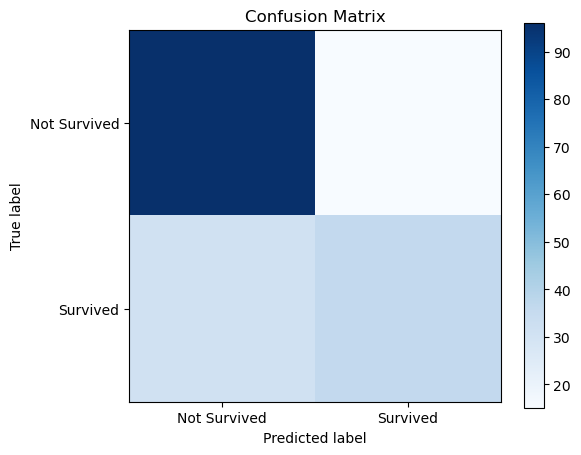

In [23]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Print the columns to check if 'Ticket' and 'Cabin' exist
    print("Columns in the dataset:", df.columns)
    
    # Drop columns that are not useful for prediction
    # Adjust column names based on the output above
    df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True, errors='ignore')
    
    # Fill missing values in the 'Age' column with the median value
    df['Age'].fillna(df['Age'].median(), inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y



# Step 2: Train and evaluate the SVM model
def train_and_evaluate_svm():
    """
    Train a Support Vector Machine (SVM) model and evaluate its performance on the Titanic dataset.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the SVM classifier with a linear kernel
    svm_model = SVC(kernel='linear')
    
    # Train the model
    svm_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test set: {accuracy:.4f}")
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")
    
    # Visualize the confusion matrix using a heatmap
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.xticks([0, 1], ['Not Survived', 'Survived'])
    plt.yticks([0, 1], ['Not Survived', 'Survived'])
    plt.show()

# Step 3: Run the training and evaluation function
train_and_evaluate_svm()
